# Week 2 - Task 1 | GroundZero AI


---



### Import the necessary libraries
Let's first import all the libraries we are going to use in this task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([7, 8, 10, 12, 15, 18, 21, 24, 27])
y = np.array([9, 10, 12, 13, 16, 20, 30, 25, 29])

## First Method

- Directly finding the most optimal values for parameters using the Ordinary least Square method(discuss in video)

The parametric equation:


$$\hat{y} = m x + c$$



m and c will be given by: 

$$m = \frac{\sum (X_i - \bar{X})(y_i - \bar{y})}{\sum (X_i - \bar{X})^2}$$

$$c = \bar{y} - m \bar{X}$$


***Note:*** These values will be the most optimal values for m and c which will give the best fit line

In [4]:
x_mean = np.mean(X)
y_mean = np.mean(y)

In [9]:


m = (sum((X-x_mean) * (y-y_mean)))/(sum((X-x_mean)**2))
c = y_mean - m*x_mean

In [8]:
sum((X-x_mean) * (y-y_mean))

np.float64(444.44444444444446)

In [10]:
# predicting the values
y_hat = m*X + c

In [11]:
y_hat

array([ 8.74298056,  9.82289417, 11.98272138, 14.1425486 , 17.38228942,
       20.62203024, 23.86177106, 27.10151188, 30.3412527 ])

#### Mean Square Loss(MSE): 

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$



In [12]:
mse = np.mean((y-y_hat)**2)

In [13]:
print(f'MSE: {mse}')
print(f'Slope(m): {m}')
print(f'Intercept(c): {c}')

MSE: 5.288216942644587
Slope(m): 1.0799136069114472
Intercept(c): 1.183585313174941


## Second Method: Machine learning approach

Linear Regression equation is: $\hat{y} = \sum_{i=1}^{n} W_i x_i + b$ where W(weights) and b(bias) are parameters of x


i.e      $$\hat{y} = W_1 x_1 + W_2 x_2 + W_3 x_3......+W_n x_n  + b$$


Since, we have only one feature X, so we will use only one W. Bias b cannot have multiple values.
So, equation will be: y_prediction = $\hat{y} = W x + b$

In [14]:
np.random.seed(42)
w = np.random.rand() # initialize the weights w randomly(small values)
b = np.random.rand() # initialize the bias b randomly(small values)

**Terminologies:**
- Learning rate: A hyperparameters(means user decide it) which determines how much the parameters should be updated. Its values should be in decimals


**Process:**
1. Computing the gradients of the loss function (MSE) with respect to w and b.
2. Updating w and  b using the gradients.
3. Repeating the process for several epochs until the loss is minimize.

***Step 1:*** Compute the Loss gradient with w and b
$$\frac{\partial L}{\partial w} = Calcuate$$
$$\frac{\partial L}{\partial c} = - \frac{1}{n} \sum (y - \hat{y} \cdot 2)$$

***Step 2:*** Update the w and b using gradients


w = w - learning_rate*$\frac{\partial L}{\partial w}$


b = b - learning_rate*$\frac{\partial L}{\partial c}$


***Step 3:*** Calculate the Loss using update w and b

In [16]:
loss_history = []
loss = 0

epochs = 50
learning_rate = 0.001   # INPUT - value for learning rate. Try to play with diffenect values and see how it affect the loss

for epoch in range(epochs):
    # Compute predictions 
    y_pred = w * X + b

    # Compute the gradients
    w_grad = (1/len(X)) * np.sum((y_pred - y) * X)
    b_grad = (1/len(X)) * np.sum(y_pred - y)

    # Update the parameters
    w = w - learning_rate * w_grad
    w = w - learning_rate * b_grad

    # Compute the Mean Squared Error (MSE)
    loss = np.mean((y_pred - y) ** 2)
    loss_history.append(loss)
    loss = loss

    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch} | Loss: {loss:.3f} | m: {w:.3f} | c: {b:.3f}')

Epoch 0 | Loss: 157.138 | m: 0.597 | c: 0.951
Epoch 10 | Loss: 5.385 | m: 1.080 | c: 0.951
Epoch 20 | Loss: 5.297 | m: 1.092 | c: 0.951
Epoch 30 | Loss: 5.297 | m: 1.092 | c: 0.951
Epoch 40 | Loss: 5.297 | m: 1.092 | c: 0.951


In [17]:
y_prediction = w*X + b

In [18]:
y_prediction

array([ 8.5982071 ,  9.69070607, 11.87570401, 14.06070195, 17.33819886,
       20.61569577, 23.89319268, 27.17068959, 30.4481865 ])

In [19]:
epo = range(0, epochs)

Text(0, 0.5, 'loss')

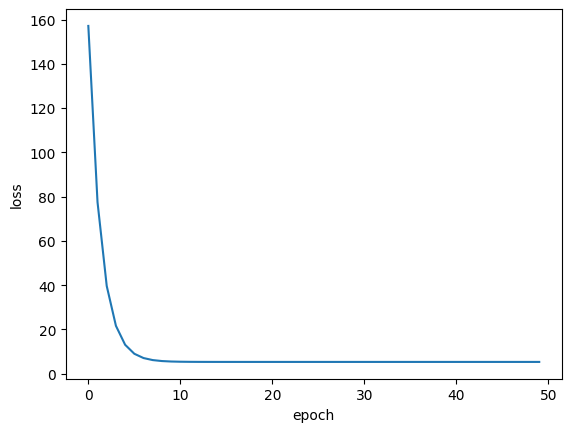

In [20]:
plt.plot(epo, loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')

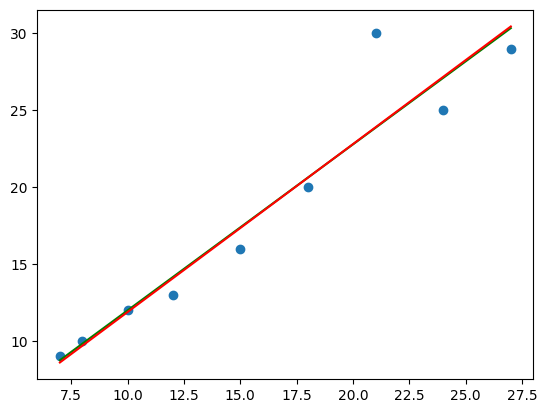

In [21]:
plt.scatter(X, y)
plt.plot(X, y_hat, color='green')
plt.plot(X, y_pred, color='red')

In [22]:
# Check the values of parameters and loss you get by both methods

print(f'First method parameters: ')
print(f'Loss: {mse} | Weight: {m} | Bias: {c}')

print(f'Second method parameters: ')
print(f'Loss: {loss} | Weight: {w} | Bias: {b}')

First method parameters: 
Loss: 5.288216942644587 | Weight: 1.0799136069114472 | Bias: 1.183585313174941
Second method parameters: 
Loss: 5.296636548750629 | Weight: 1.0924989701928356 | Bias: 0.9507143064099162


`The results of both the methods should be similar.`